 # <p style="color:blue"><center> Introduction</center></p>
**We all know that birds are the creatures that are most vulnerable to risks and that they face various types of these many dangers, so we, as data scientists, must provide the best we have to help the organizations that are in the eyes of the eye specializing in helping birds and the organizations responsible for that and provide the best analyzes for them.**

![Birdes](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQM_tI5u29WHhcyBilT5vMfjmywWqtS-9Iscw&usqp=CAU)
![Birdes](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8-TegC4ENTy0ywDXXLGWZkitqi_7s32gEmA&usqp=CAU)

**Recent advances in robotic listening have improved audio data collection. However, generating and retrieving analysis outputs with high accuracy remains a challenge. The majority of the data has not been examined due to the lack of effective tools to efficiently and reliably extract signals of interest (for example, bird calls).
The Hua Laboratory is the most popular, best and much interested laboratory, dedicated to enhancing the understanding and protection of birds and the natural world. The lab joins people from all walks of life to make new scientific discoveries, share ideas, and stimulate conservation actions. In this competition, they collaborate with Google Research, LifeCLEF, and Xeno-canto.**

# **Import some used Libraries**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import soundfile as sf

# import dataset 

In [2]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

import plotly.graph_objects as go
import plotly.express as px
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import librosa
import librosa.display
import IPython.display as ipd
from sklearn.model_selection import train_test_split

from keras.utils import Sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.applications import VGG19, VGG16, ResNet50

import sklearn
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_meta=pd.read_csv('../input/birdclef-2021/train_metadata.csv')
train_sound=pd.read_csv('../input/birdclef-2021/train_soundscape_labels.csv')
test_df=pd.read_csv('../input/birdclef-2021/test.csv')
sample_submission=pd.read_csv('../input/birdclef-2021/sample_submission.csv')

# read dataset

In [4]:
train_meta.head(10)

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,date,filename,license,rating,time,url
0,acafly,['amegfi'],"['begging call', 'call', 'juvenile']",35.3860,-84.1250,Empidonax virescens,Acadian Flycatcher,Mike Nelson,2012-08-12,XC109605.ogg,Creative Commons Attribution-NonCommercial-Sha...,2.5,09:30,https://www.xeno-canto.org/109605
1,acafly,[],['call'],9.1334,-79.6501,Empidonax virescens,Acadian Flycatcher,Allen T. Chartier,2000-12-26,XC11209.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,?,https://www.xeno-canto.org/11209
2,acafly,[],['call'],5.7813,-75.7452,Empidonax virescens,Acadian Flycatcher,Sergio Chaparro-Herrera,2012-01-10,XC127032.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,15:20,https://www.xeno-canto.org/127032
3,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129974.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,07:50,https://www.xeno-canto.org/129974
4,acafly,['whwbec1'],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2009-06-19,XC129981.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.5,07:50,https://www.xeno-canto.org/129981
5,acafly,[],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2007-11-05,XC130056.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,07:45,https://www.xeno-canto.org/130056
6,acafly,[],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2007-11-12,XC130133.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,07:50,https://www.xeno-canto.org/130133
7,acafly,[],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2007-11-12,XC130140.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,14:00,https://www.xeno-canto.org/130140
8,acafly,[],"['call', 'song']",4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2007-12-02,XC130750.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:15,https://www.xeno-canto.org/130750
9,acafly,[],['call'],4.6717,-75.6283,Empidonax virescens,Acadian Flycatcher,Oscar Humberto Marin-Gomez,2008-02-07,XC131193.ogg,Creative Commons Attribution-NonCommercial-Sha...,3.0,17:10,https://www.xeno-canto.org/131193


In [5]:
train_sound.head()

,row_id,site,audio_id,seconds,birds
0,7019_COR_5,COR,7019,5,nocall
1,7019_COR_10,COR,7019,10,nocall
2,7019_COR_15,COR,7019,15,nocall
3,7019_COR_20,COR,7019,20,nocall
4,7019_COR_25,COR,7019,25,nocall


In [6]:
path = '/kaggle/input/birdclef-2021/'
os.listdir(path)

['train_soundscape_labels.csv',
 'sample_submission.csv',
 'train_soundscapes',
 'train_short_audio',
 'test.csv',
 'train_metadata.csv',
 'test_soundscapes']

In [7]:
test_df.head()

,row_id,site,audio_id,seconds
0,3575_COL_5,COL,3575,5
1,3575_COL_10,COL,3575,10
2,3575_COL_15,COL,3575,15


In [8]:
train_meta.shape

(62874, 14)

# showing some of information about data

In [9]:
train_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62874 entries, 0 to 62873
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     62874 non-null  object 
 1   secondary_labels  62874 non-null  object 
 2   type              62874 non-null  object 
 3   latitude          62874 non-null  float64
 4   longitude         62874 non-null  float64
 5   scientific_name   62874 non-null  object 
 6   common_name       62874 non-null  object 
 7   author            62874 non-null  object 
 8   date              62874 non-null  object 
 9   filename          62874 non-null  object 
 10  license           62874 non-null  object 
 11  rating            62874 non-null  float64
 12  time              62874 non-null  object 
 13  url               62874 non-null  object 
dtypes: float64(3), object(11)
memory usage: 6.7+ MB


# describe data

In [10]:
train_meta.describe()

,latitude,longitude,rating
count,62874.000000,62874.000000,62874.000000
mean,24.472805,-79.960828,3.755360
std,22.108481,38.370726,1.220135
min,-53.162000,-165.781200,0.000000
25%,6.246000,-108.976100,3.500000
50%,31.741400,-81.553400,4.000000
75%,41.198700,-73.133333,4.500000
max,78.928100,179.360700,5.000000


# Clarify if there are empty cells in the data or not

In [11]:
train_meta.isnull()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,date,filename,license,rating,time,url
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62869,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62870,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62871,False,False,False,False,False,False,False,False,False,False,False,False,False,False
62872,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Now showing the tail of data

In [12]:
train_meta.tail()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,date,filename,license,rating,time,url
62869,yetvir,[],"['adult', 'male', 'song']",30.2150,-97.6505,Vireo flavifrons,Yellow-throated Vireo,Caleb Helsel,2020-07-10,XC591680.ogg,Creative Commons Attribution-NonCommercial-Sha...,1.0,08:30,https://www.xeno-canto.org/591680
62870,yetvir,[],"['life stage uncertain', 'sex uncertain', 'song']",42.3005,-72.5877,Vireo flavifrons,Yellow-throated Vireo,Christopher McPherson,2019-05-31,XC600085.ogg,Creative Commons Attribution-NonCommercial-Sha...,5.0,09:30,https://www.xeno-canto.org/600085
62871,yetvir,"['amered', 'eawpew', 'norcar', 'reevir1']","['adult', 'male', 'song']",42.3005,-72.5877,Vireo flavifrons,Yellow-throated Vireo,Christopher McPherson,2020-06-02,XC602701.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.5,08:30,https://www.xeno-canto.org/602701
62872,yetvir,[],['uncertain'],32.2357,-99.8811,Vireo flavifrons,Yellow-throated Vireo,Brad Banner,2019-04-27,XC614733.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.0,17:30,https://www.xeno-canto.org/614733
62873,yetvir,"['gamqua', 'whwdov']","['adult', 'male', 'song']",31.9060,-109.1543,Vireo flavifrons,Yellow-throated Vireo,Richard E. Webster,2020-05-26,XC615888.ogg,Creative Commons Attribution-NonCommercial-Sha...,4.5,06:23,https://www.xeno-canto.org/615888


In [13]:
row = 0
train_meta.iloc[row]

primary_label                                                  acafly
secondary_labels                                           ['amegfi']
type                             ['begging call', 'call', 'juvenile']
latitude                                                       35.386
longitude                                                     -84.125
scientific_name                                   Empidonax virescens
common_name                                        Acadian Flycatcher
author                                                    Mike Nelson
date                                                       2012-08-12
filename                                                 XC109605.ogg
license             Creative Commons Attribution-NonCommercial-Sha...
rating                                                            2.5
time                                                            09:30
url                                 https://www.xeno-canto.org/109605
Name: 0, dtype: obje

# showing columns of data

In [14]:
train_meta.columns 

Index(['primary_label', 'secondary_labels', 'type', 'latitude', 'longitude',
       'scientific_name', 'common_name', 'author', 'date', 'filename',
       'license', 'rating', 'time', 'url'],
      dtype='object')

# Show chart


In [15]:
species = train_meta['primary_label'].value_counts()
fig = go.Figure(data=[go.Bar(y=species.values, x=species.index)],
                layout=go.Layout(margin=go.layout.Margin(l=0, r=1, b=5, t=10)))

fig.update_layout(title='Number of traning samples per species')
fig.show()

# Because we specify the time for the sound to use

**Here we will show you some of the audio and improve it for use**

In [16]:
train_meta['year'] = train_meta['date'].apply(lambda x: x.split('-')[0])
train_meta['month'] = train_meta['date'].apply(lambda x: x.split('-')[1])
train_meta['day_of_month'] = train_meta['date'].apply(lambda x: x.split('-')[2])

In [17]:
label = train_meta.loc[row, 'primary_label']
filename = train_meta.loc[row, 'filename']

# Check if the file is in the folder
filename in os.listdir(path+'train_short_audio/'+label)
data, samplerate = sf.read(path+'train_short_audio/'+label+'/'+filename)
print(data[:8])
print(samplerate)

[ 6.04931074e-06  1.34680715e-06 -8.47729461e-06  1.84468427e-05
 -1.12858988e-05 -1.93318670e-06 -6.18334479e-06 -5.09791244e-05]
32000


# Here we created or called this function to make and help with the sound to get the graph out

In [18]:
def read_ogg_file(path, file):
    """ Read ogg audio file and return numpay array and samplerate"""
    
    data, samplerate = sf.read(path+file)
    return data, samplerate


def plot_audio_file(data, samplerate):
    """ Plot the audio data"""
    
    sr = samplerate
    fig = plt.figure(figsize=(8, 4))
    x = range(len(data))
    y = data
    plt.plot(x, y)
    plt.plot(x, y, color='red')
    plt.legend(loc='upper center')
    plt.grid()
    
    
def plot_spectrogram(data, samplerate):
    """ Plot spectrogram with mel scaling """
    
    sr = samplerate
    spectrogram = librosa.feature.melspectrogram(data, sr=sr)
    log_spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
    librosa.display.specshow(log_spectrogram, sr=sr, x_axis='time', y_axis='mel')

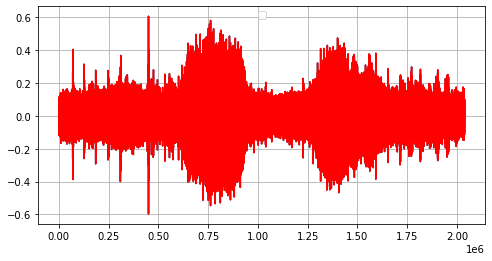

In [19]:
plot_audio_file(data, samplerate)

# ploting spectrogram to showing result 

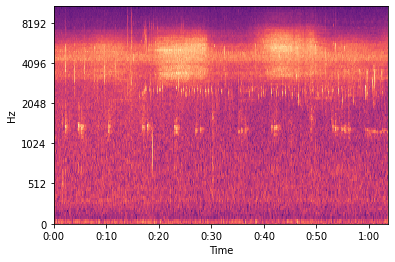

In [20]:
plot_spectrogram(data, samplerate)

# Do some analyzes for the data

In [21]:
train_sound['audio_id'].unique()

array([ 7019,  7954, 11254, 18003, 21767, 26746, 31928, 44957, 50878,
       57610,  2782,  7843, 10534, 14473, 20152, 26709, 28933, 42907,
       51010, 54955])

In [22]:
train_sound.groupby(by=['audio_id']).count()['birds'][:4]

audio_id
2782    120
7019    120
7843    120
7954    120
Name: birds, dtype: int64

In [23]:
labels = []
for row in train_sound.index:
    labels.extend(train_sound.loc[row, 'birds'].split(' '))
labels = list(set(labels))

print('Number of unique bird labels:', len(labels))

Number of unique bird labels: 49


In [24]:
df_labels_train = pd.DataFrame(index=train_sound.index, columns=labels)
for row in train_sound.index:
    birds = train_sound.loc[row, 'birds'].split(' ')
    for bird in birds:
        df_labels_train.loc[row, bird] = 1
df_labels_train.fillna(0, inplace=True)

# We set a dummy value for the target label in the test data because we will need for the Data Generator
test_df['birds'] = 'nocall'

df_labels_test = pd.DataFrame(index=test_df.index, columns=labels)
for row in test_df.index:
    birds = test_df.loc[row, 'birds'].split(' ')
    for bird in birds:
        df_labels_test.loc[row, bird] = 1
df_labels_test.fillna(0, inplace=True)
df_labels_train.sum().sort_values(ascending=False)[:20]

nocall     1529
rucwar      179
reevir1     154
sonspa       90
bobfly1      90
rewbla       78
eawpew       78
grycat       67
bkcchi       67
balori       40
comyel       29
eastow       21
norcar       20
runwre1      19
gockin       19
crfpar       18
obnthr1      18
rubwre1      18
cangoo       18
chswar       16
dtype: int64

# Now we're going to do a simple merge between data train_sound and test_df

In [25]:
train_sound = pd.concat([train_sound, df_labels_train], axis=1)
test_df = pd.concat([test_df, df_labels_test], axis=1)
print(train_sound)

             row_id site  audio_id  seconds   birds  sthwoo1  sonspa  bkcchi  \
0        7019_COR_5  COR      7019        5  nocall        0       0       0   
1       7019_COR_10  COR      7019       10  nocall        0       0       0   
2       7019_COR_15  COR      7019       15  nocall        0       0       0   
3       7019_COR_20  COR      7019       20  nocall        0       0       0   
4       7019_COR_25  COR      7019       25  nocall        0       0       0   
...             ...  ...       ...      ...     ...      ...     ...     ...   
2395  54955_SSW_580  SSW     54955      580  nocall        0       0       0   
2396  54955_SSW_585  SSW     54955      585  grycat        0       0       0   
2397  54955_SSW_590  SSW     54955      590  grycat        0       0       0   
2398  54955_SSW_595  SSW     54955      595  nocall        0       0       0   
2399  54955_SSW_600  SSW     54955      600  nocall        0       0       0   

      chswar  ovenbi1  ...  haiwoo  whc

In [26]:
print(test_df)

        row_id site  audio_id  seconds   birds  sthwoo1  sonspa  bkcchi  \
0   3575_COL_5  COL      3575        5  nocall        0       0       0   
1  3575_COL_10  COL      3575       10  nocall        0       0       0   
2  3575_COL_15  COL      3575       15  nocall        0       0       0   

   chswar  ovenbi1  ...  haiwoo  whcpar  comgra  bobfly1  grhcha1  rtlhum  \
0       0        0  ...       0       0       0        0        0       0   
1       0        0  ...       0       0       0        0        0       0   
2       0        0  ...       0       0       0        0        0       0   

   norcar  balori  plawre1  amegfi  
0       0       0        0       0  
1       0       0        0       0  
2       0       0        0       0  

[3 rows x 54 columns]


# Now we're going to plot this matrix to see what the result is

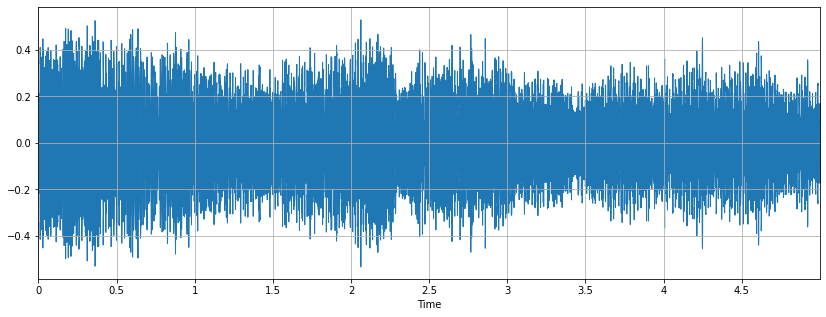

In [27]:
file = os.listdir(path+'train_soundscapes')[0]
file
data, samplerate = read_ogg_file(path+'train_soundscapes/', file)

sub_data = data[int(455/5)*160000:int(460/5)*160000]
plt.figure(figsize=(14, 5))
librosa.display.waveplot(sub_data, sr=samplerate)
plt.grid()
plt.show()

# Now we can hear some voices

In [28]:
import librosa
audio_data = '../input/birdclef-2021/train_short_audio/acafly/XC109605.ogg'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(1404025,) 22050


In [29]:
import IPython.display as ipd
ipd.Audio(audio_data)

# This is a drawing of the recorded external sound

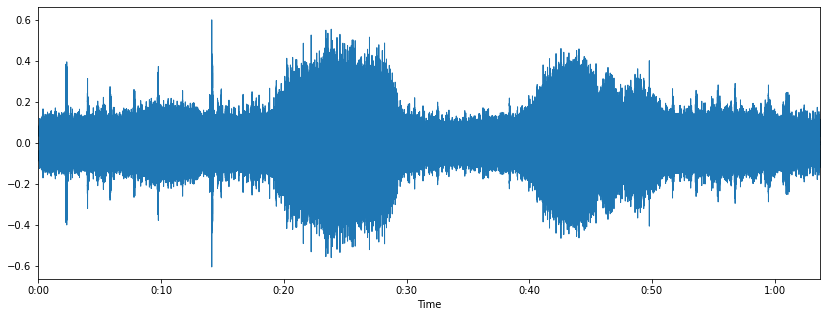

In [30]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [31]:
df=sample_submission
df.to_csv('submission.csv', index=False)

In [32]:
df

,row_id,birds
0,3575_COL_5,nocall
1,3575_COL_10,nocall
2,3575_COL_15,nocall
